# Laying the Foundation for Analysis

#####  Setup & Imports

In [5]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import adfuller
import sys

# Set plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline

In [6]:
# Load the processed file generated by prepare_data.py
processed_path = '../data/processed/brent_oil_log_returns.csv'
df = pd.read_csv(processed_path)
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Price,Log_Return
0,1987-05-21,18.45,-0.009709
1,1987-05-22,18.55,0.005405
2,1987-05-25,18.60,0.002692
3,1987-05-26,18.63,0.001612
4,1987-05-27,18.60,-0.001612


##### Visualize Brent Oil Prices

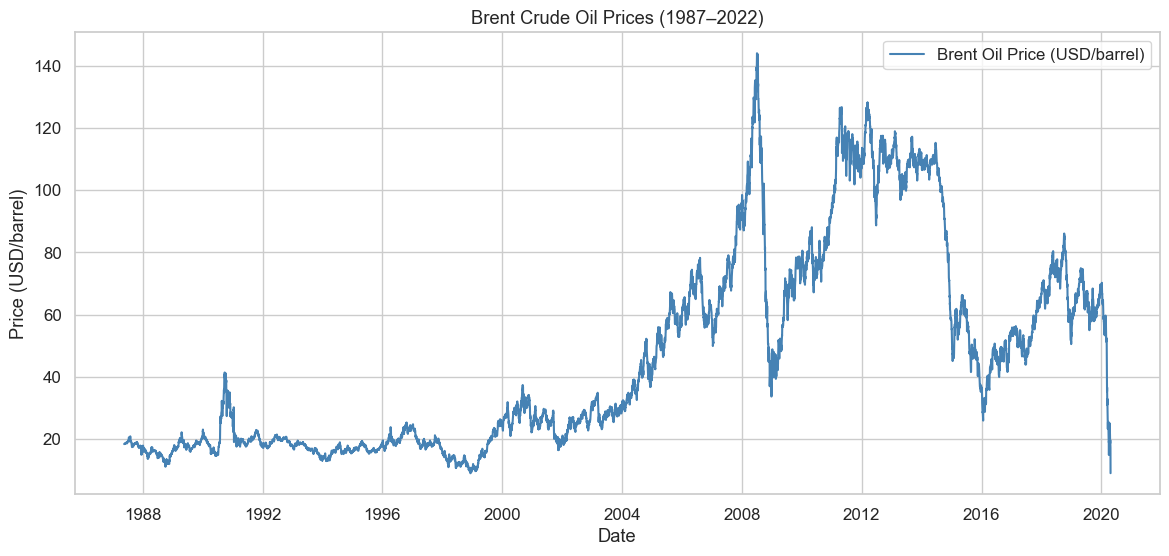

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price (USD/barrel)', color='steelblue')
plt.title('Brent Crude Oil Prices (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.show()

##### Visualize Daily Log Returns

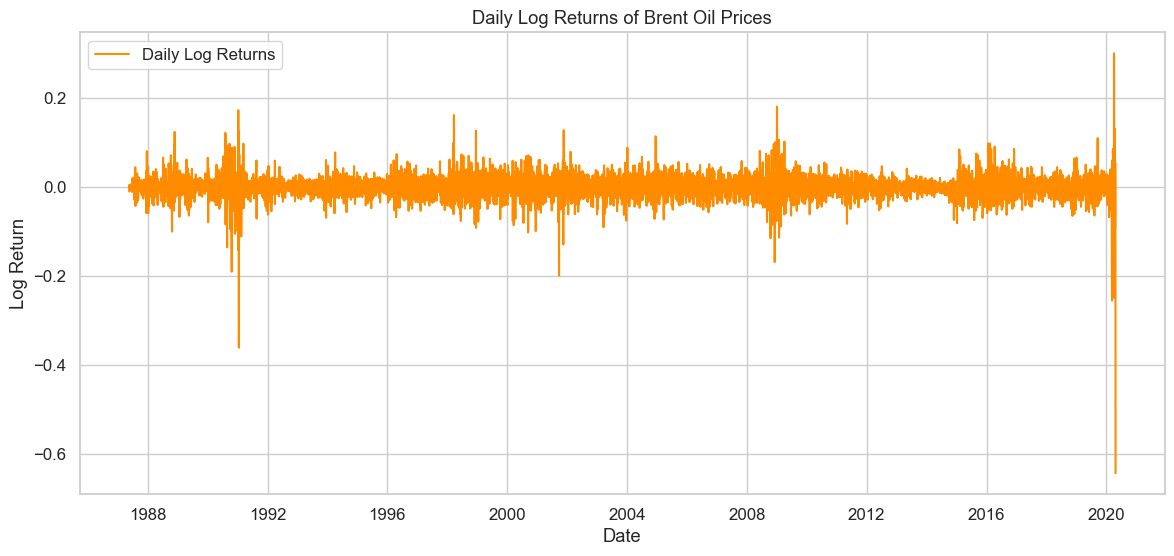

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Log_Return'], color='darkorange', label='Daily Log Returns')
plt.title('Daily Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()


##### Stationarity Test (ADF)

In [9]:
# Augmented Dickey-Fuller Test
adf_result = adfuller(df['Log_Return'])

print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

if adf_result[1] < 0.05:
    print("Log returns are stationary (reject H0).")
else:
    print("Log returns are not stationary (fail to reject H0).")

ADF Statistic: -12.6031
p-value: 0.0000
Log returns are stationary (reject H0).


##### Rolling Statistics

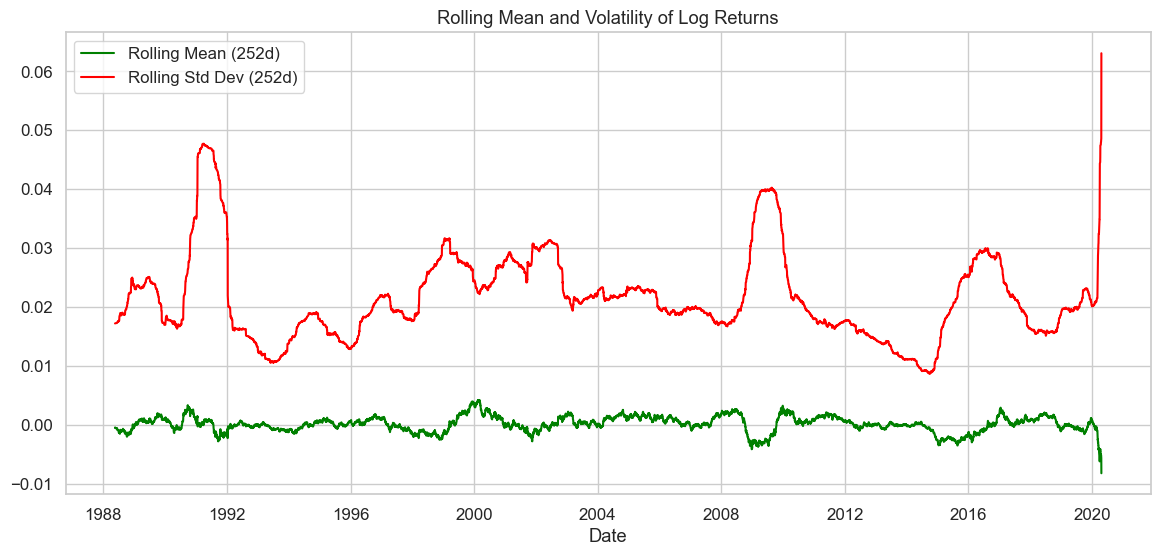

In [10]:
window = 252 # roughly one trading year

plt.figure(figsize=(14, 6))
df['Rolling Mean'] = df['Log_Return'].rolling(window=window).mean()
df['Rolling Std'] = df['Log_Return'].rolling(window=window).std()

plt.plot(df['Date'], df['Rolling Mean'], label='Rolling Mean (252d)', color='green')
plt.plot(df['Date'], df['Rolling Std'], label='Rolling Std Dev (252d)', color='red')
plt.title('Rolling Mean and Volatility of Log Returns')
plt.xlabel('Date')
plt.legend()
plt.show()

In [11]:
# Save the processed data with rolling mean and std
df.to_csv('../data/processed/brent_oil_mean&std.csv', index=False)